# Problem Statment
### After covid the company wants to recover loss with huge profit by analysing the followings
    1. Indepent variables(X) which will help to understand the demand for sharebike over Count(Y) 
    2. How well variable describe the bike demand
    3. To build model using Multiple Linear Regression Mode will Train and Test the dataset for above answers


In [321]:
## import all important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [322]:
BoomBike = pd.read_csv("day.csv",index_col=0)
BoomBike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [323]:
## Check Data for any null values and missing values
print("Shape :",BoomBike.shape,"\n")
print("\n Null-Value :",BoomBike.info())
print("\n Description :\n",BoomBike.describe())


Shape : (730, 15) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB

 Null-Value : None

 Description :
            season          yr        mnth     holiday     weekday  workingday

## Data Cleaning 
    Fix Row and Columns
    Fix missing values
    Standardizing values
    Fix invalid values
    Filter Data

In [324]:
## Lets drop the column having dteday as there is month and year columns and 1 to 31 days ordered categorical variable will create more columns

BoomBike = BoomBike.drop('dteday',axis=1)

In [325]:
## Check for Duplicates and remove from the dataset
BoomBike = BoomBike.drop_duplicates()
BoomBike.shape

(730, 14)

#### Observation:
    1. No missing values 
    2. No Rows and columns to be fixed
    3. No duplicates to be removed
    4. No Standardzing values needed
   

## Visualization
    1. Visualizing the Categorical variable and understand the relationship

<Axes: xlabel='weathersit', ylabel='cnt'>

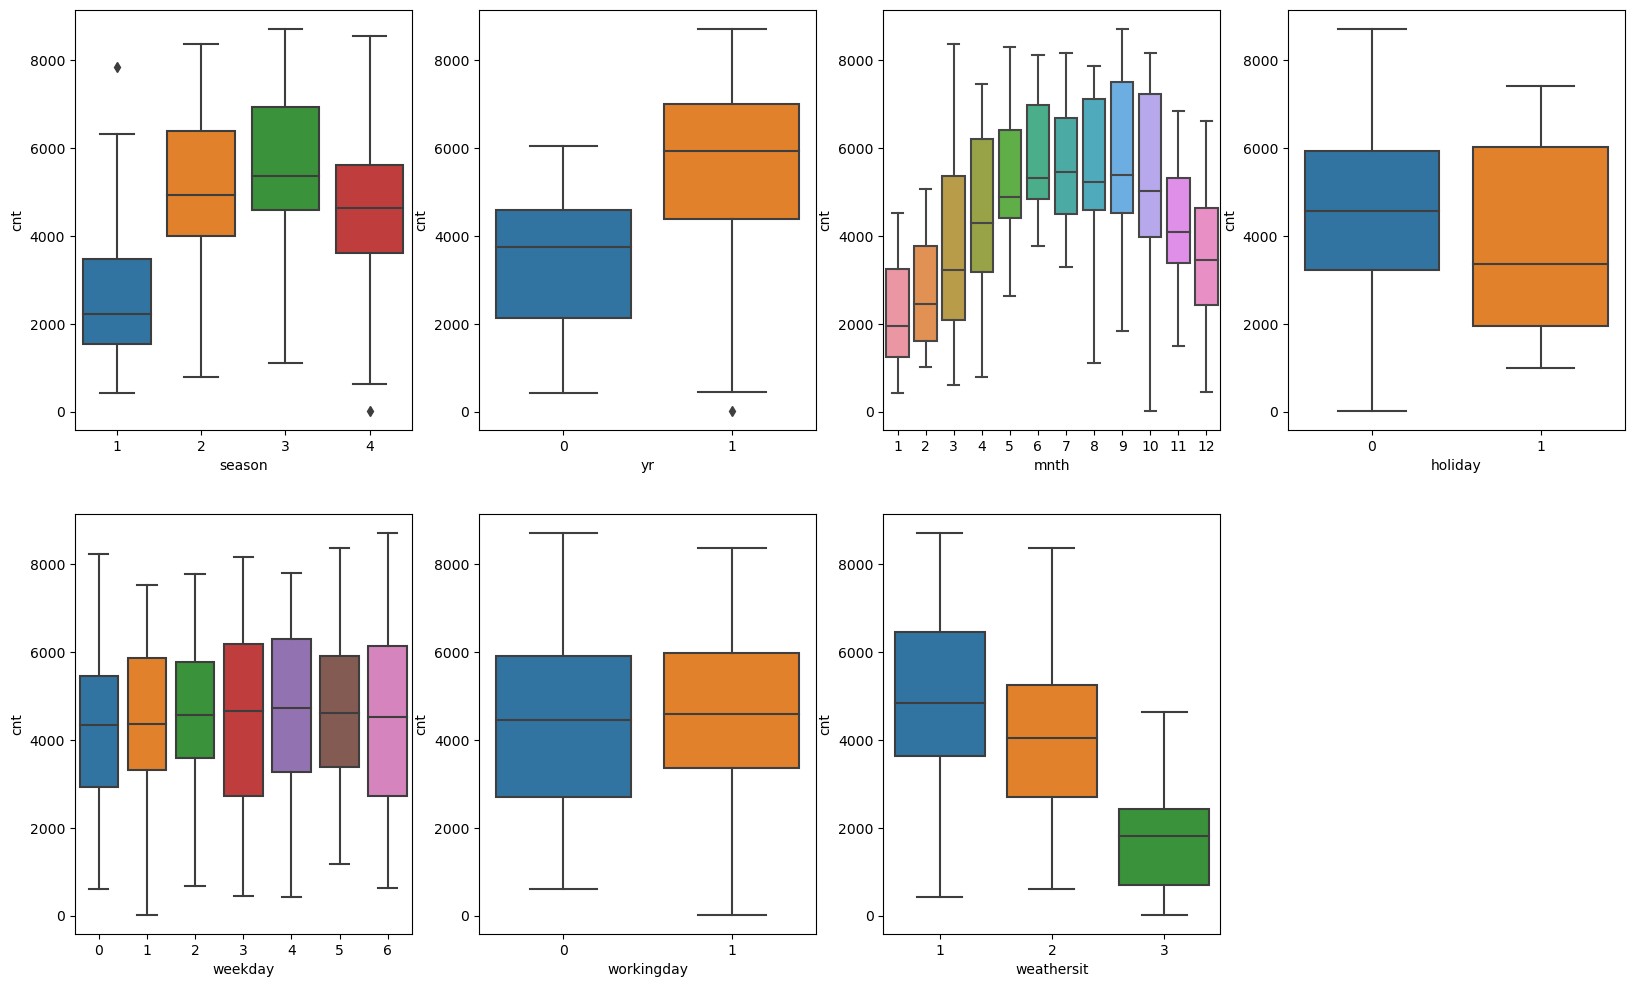

In [326]:
## Visualizing The Categorical Variable with dependent variable
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(data=BoomBike,y='cnt',x='season')
plt.subplot(2,4,2)
sns.boxplot(data=BoomBike,y='cnt',x='yr')
plt.subplot(2,4,3)
sns.boxplot(data=BoomBike,y='cnt',x='mnth')
plt.subplot(2,4,4)
sns.boxplot(data=BoomBike,y='cnt',x='holiday')
plt.subplot(2,4,5)
sns.boxplot(data=BoomBike,y='cnt',x='weekday')
plt.subplot(2,4,6)
sns.boxplot(data=BoomBike,y='cnt',x='workingday')
plt.subplot(2,4,7)
sns.boxplot(data=BoomBike,y='cnt',x='weathersit')

## Visualizing Numerical Correlation

In [327]:
BoomBike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

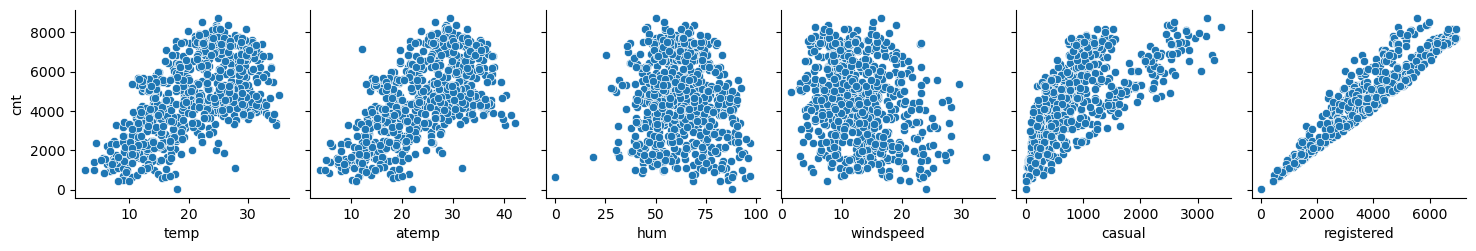

In [328]:
### check for linear regression for numerical values
plt.Figure(figsize=(20,15))
sns.pairplot(data=BoomBike, x_vars=['temp','atemp', 'hum','windspeed','casual','registered'],y_vars='cnt')


In [329]:
NumColums = ['temp','atemp', 'hum','windspeed','casual','registered','cnt']
NumCorr = BoomBike[NumColums].corr()
NumCorr


,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


## Mapping
    1. Mapping numerical values to orginal values as per the metadata for all columns

In [330]:
### Lets first check the values counts for those columns
print("Weather \n",BoomBike['weathersit'].value_counts())
print("\nSeason \n",BoomBike['season'].value_counts())
print("\nMonths \n",BoomBike['mnth'].value_counts())
print("\nweekday \n",BoomBike['weekday'].value_counts())


Weather 
 1    463
2    246
3     21
Name: weathersit, dtype: int64

Season 
 3    188
2    184
1    180
4    178
Name: season, dtype: int64

Months 
 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

weekday 
 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


In [331]:
## Maping season with names for creating new columns from 1 to 4
season=['season']
BoomBike[season] = BoomBike[season].apply(lambda x: x.map({1:'spring',2:'summer', 3:'fall', 4:'winter'}))

## Maping season with names for creating new columns from from 1 t0 3
weather=['weathersit']
BoomBike[weather] = BoomBike[weather].apply(lambda x: x.map({1:'cloudy',2:'Mist_Clody', 3:'LightSnow'}))

## Maping Mnths with name for order categorical variable from 1 to 12
Months = ['mnth']
BoomBike[Months] = BoomBike[Months].apply(lambda x: x.map({1:'jan',2:'feb', 3:'mar', 4:'apr',
                                                           5:'may', 6:'june',7:'july',8:'aug',
                                                           9:'sep',10:'oct',11:'nov',12:'dec'}))

# Mapping weekdays for order categorical variables from 0 t0 6
Weekdays = ['weekday']
BoomBike[Weekdays] = BoomBike[Weekdays].apply(lambda x: x.map({1:'mon',2:'Tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'}))

BoomBike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,
1,spring,0,jan,0,sat,0,Mist_Clody,14.110847,18.18125,80.5833,10.749882,331,654,985
2,spring,0,jan,0,sun,0,Mist_Clody,14.902598,17.68695,69.6087,16.652113,131,670,801
3,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,spring,0,jan,0,Tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Observation
    1. There are four columns which has categorical values to be replaced with and then use for further analysis
    2. columns - "season, weathersit, mnth, weekday "
    3. All the columns are mapped and ready for analysis

## Dummy Variables
    1. columns - "season, weathersit, mnth, weekday "

In [332]:
## Lets crate dummy variables for the ordered & unordered categorical varibales for four columsn
DummyColumns = ['season', 'weathersit', 'mnth', 'weekday']
DummyVarSeason = pd.get_dummies(data = BoomBike[DummyColumns],drop_first=True)
DummyVarSeason.head()

,season_spring,season_summer,season_winter,weathersit_Mist_Clody,weathersit_cloudy,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [333]:
### Merge the dummy columns with the orginal dataset
BoomBike = pd.concat([BoomBike,DummyVarSeason],axis=1)
print('Shape -> ',BoomBike.shape)
BoomBike.head()

Shape ->  (730, 36)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,0,jan,0,sat,0,Mist_Clody,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,sun,0,Mist_Clody,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,Tue,1,cloudy,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
5,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [334]:
### Drop columns as n-1 categorical columns
DropColumns = ['season', 'weathersit', 'mnth', 'weekday']
BoomBike = BoomBike.drop(DropColumns,axis=1)
BoomBike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,1


In [335]:
BoomBike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Mist_Clody', 'weathersit_cloudy',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_wed'],
      dtype='object')

## EDA - Bivariate Analysis

In [336]:
### The Target Variable(Y) is 'cnt' so lets check the univaraite analysis with the variables
CorrDataset = BoomBike.corr()
CorrDataset

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
yr,1.000000e+00,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,...,7.671648e-17,-2.983215e-17,8.571788e-17,-2.138778e-17,-5.819694e-17,0.003904,-0.003904,0.003904,-1.086706e-16,-0.003935
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,...,6.362682e-03,6.785194e-02,6.362682e-03,8.174933e-03,-2.325423e-02,0.279764,-0.070541,-0.070541,-2.325423e-02,-0.046213
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542,...,6.541813e-03,-1.087082e-02,-4.023504e-03,-1.087082e-02,2.604690e-01,0.152976,-0.602419,-0.602419,2.604690e-01,0.267305
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,...,1.651884e-01,-2.066901e-01,-1.761584e-02,1.977294e-01,-5.003258e-06,-0.004799,-0.030363,-0.026802,1.949216e-02,0.023459
atemp,4.721519e-02,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,...,1.704469e-01,-1.968773e-01,-4.775183e-03,1.924774e-01,-8.544145e-03,0.000091,-0.031340,-0.023247,2.045265e-02,0.020842
hum,-1.125471e-01,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,...,1.312731e-01,-5.837193e-03,1.415566e-01,1.831181e-01,-3.980893e-02,0.028591,-0.023310,0.000020,-5.200348e-02,0.046059
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132,...,-2.953449e-02,-2.587339e-02,-6.013274e-02,-9.482530e-02,-2.163260e-02,0.000999,0.032187,-0.010429,5.792278e-03,-0.014025
casual,2.505017e-01,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123,...,1.621063e-01,-1.043441e-01,5.090309e-02,1.408129e-01,-5.760972e-02,-0.104629,0.368053,0.292196,-1.534628e-01,-0.173338
registered,5.969106e-01,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411,...,9.318193e-02,-4.151629e-03,1.126991e-01,1.796467e-01,7.302158e-02,0.001376,-0.150802,-0.202015,1.091864e-01,0.093682
cnt,5.697285e-01,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000,...,1.325529e-01,-4.034360e-02,1.088461e-01,1.946635e-01,3.840273e-02,-0.035991,0.009012,-0.059146,3.355106e-02,0.014012


In [337]:
#sns.pairplot(CorrDataset)
# plt.show()

#### Observation
    1. The registered has a high correlation with cnt variable

## Multicollinearity
    1. Check for multicollinearity

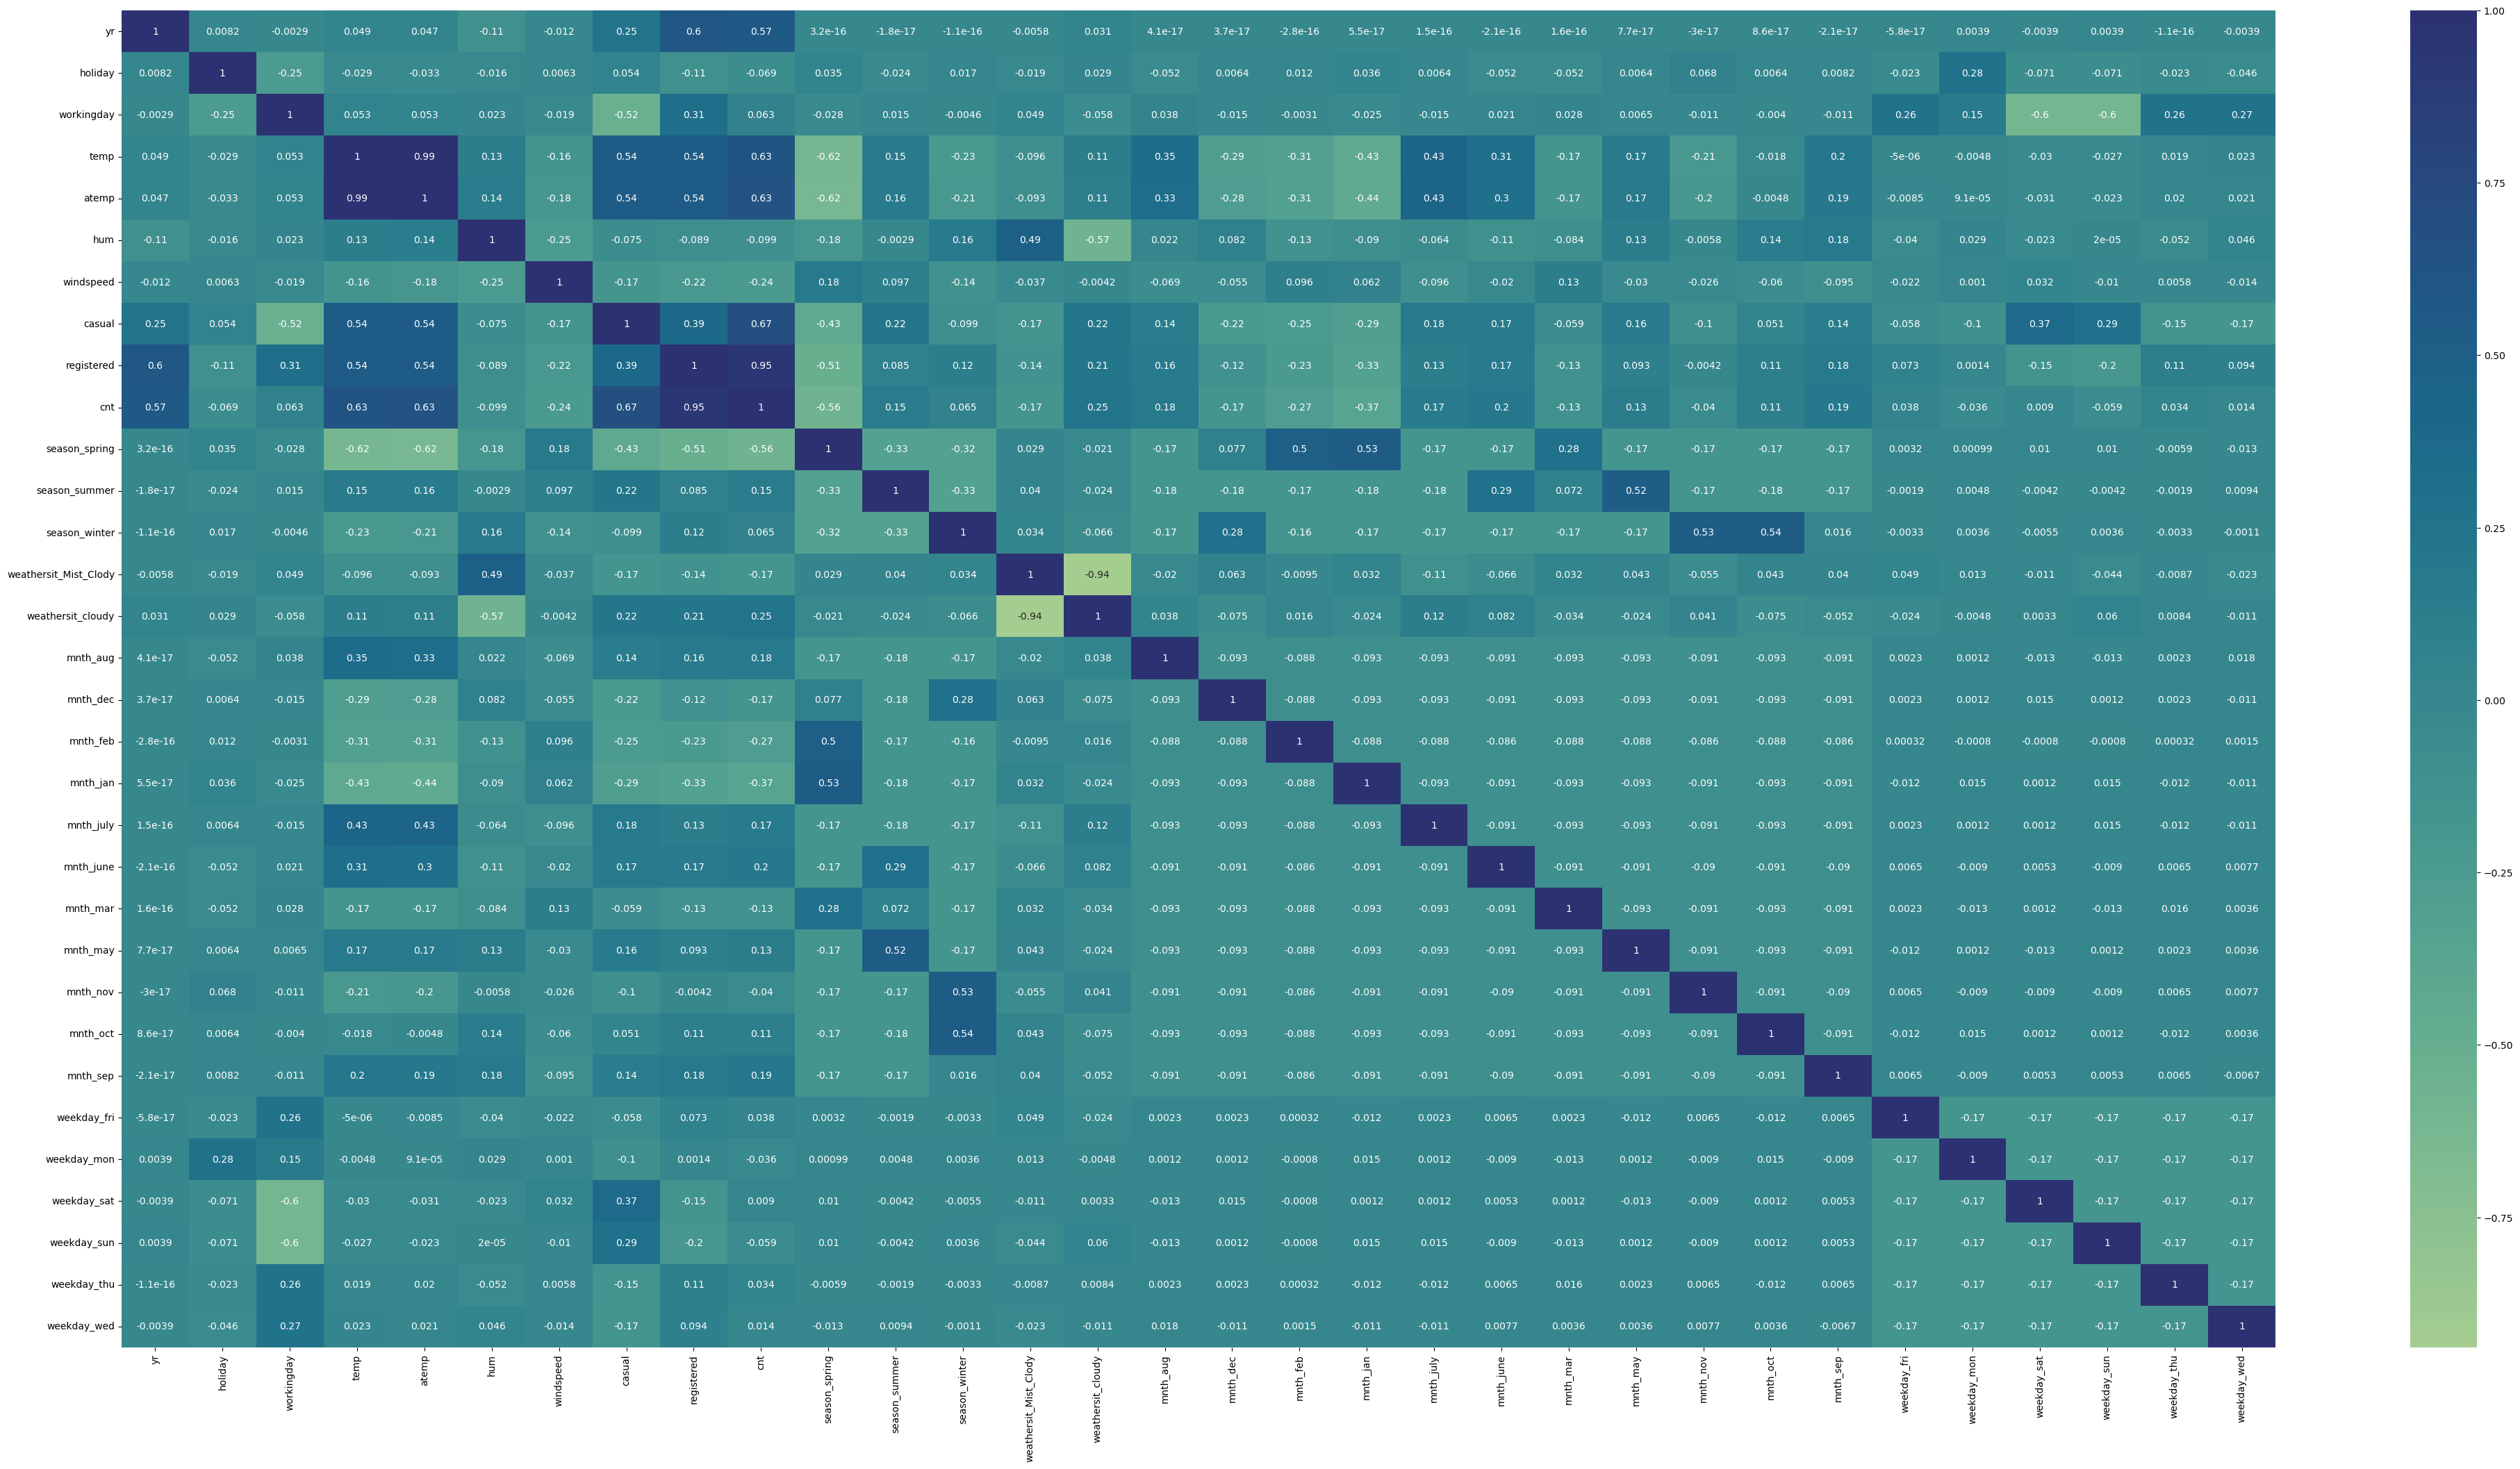

In [338]:
CorrDataset = BoomBike.corr()
plt.figure(figsize=(50,25))
sns.heatmap(CorrDataset, annot=True, cmap='crest')
plt.show()

### Deal with Multicollinearity
    1. Drop Columns with high correlation

In [339]:
### There is a high corelation between 
# 1.casual, 2.registered to Traget Variable 'cnt'
# 2. Temp and atemp are high correlated
#-----------------------------------------------------
## remove the Columns 'casual' and 'registered'
print('Before Drop -> ',BoomBike.shape)
DropColumn_with_Multicollinearity = ['casual','registered','temp']
BoomBike = BoomBike.drop(DropColumn_with_Multicollinearity,axis=1)
print('After Drop -> ',BoomBike.shape)
print('\nColumns\n',BoomBike.columns)

Before Drop ->  (730, 32)
After Drop ->  (730, 29)

Columns
 Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Mist_Clody', 'weathersit_cloudy', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_fri',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_wed'],
      dtype='object')


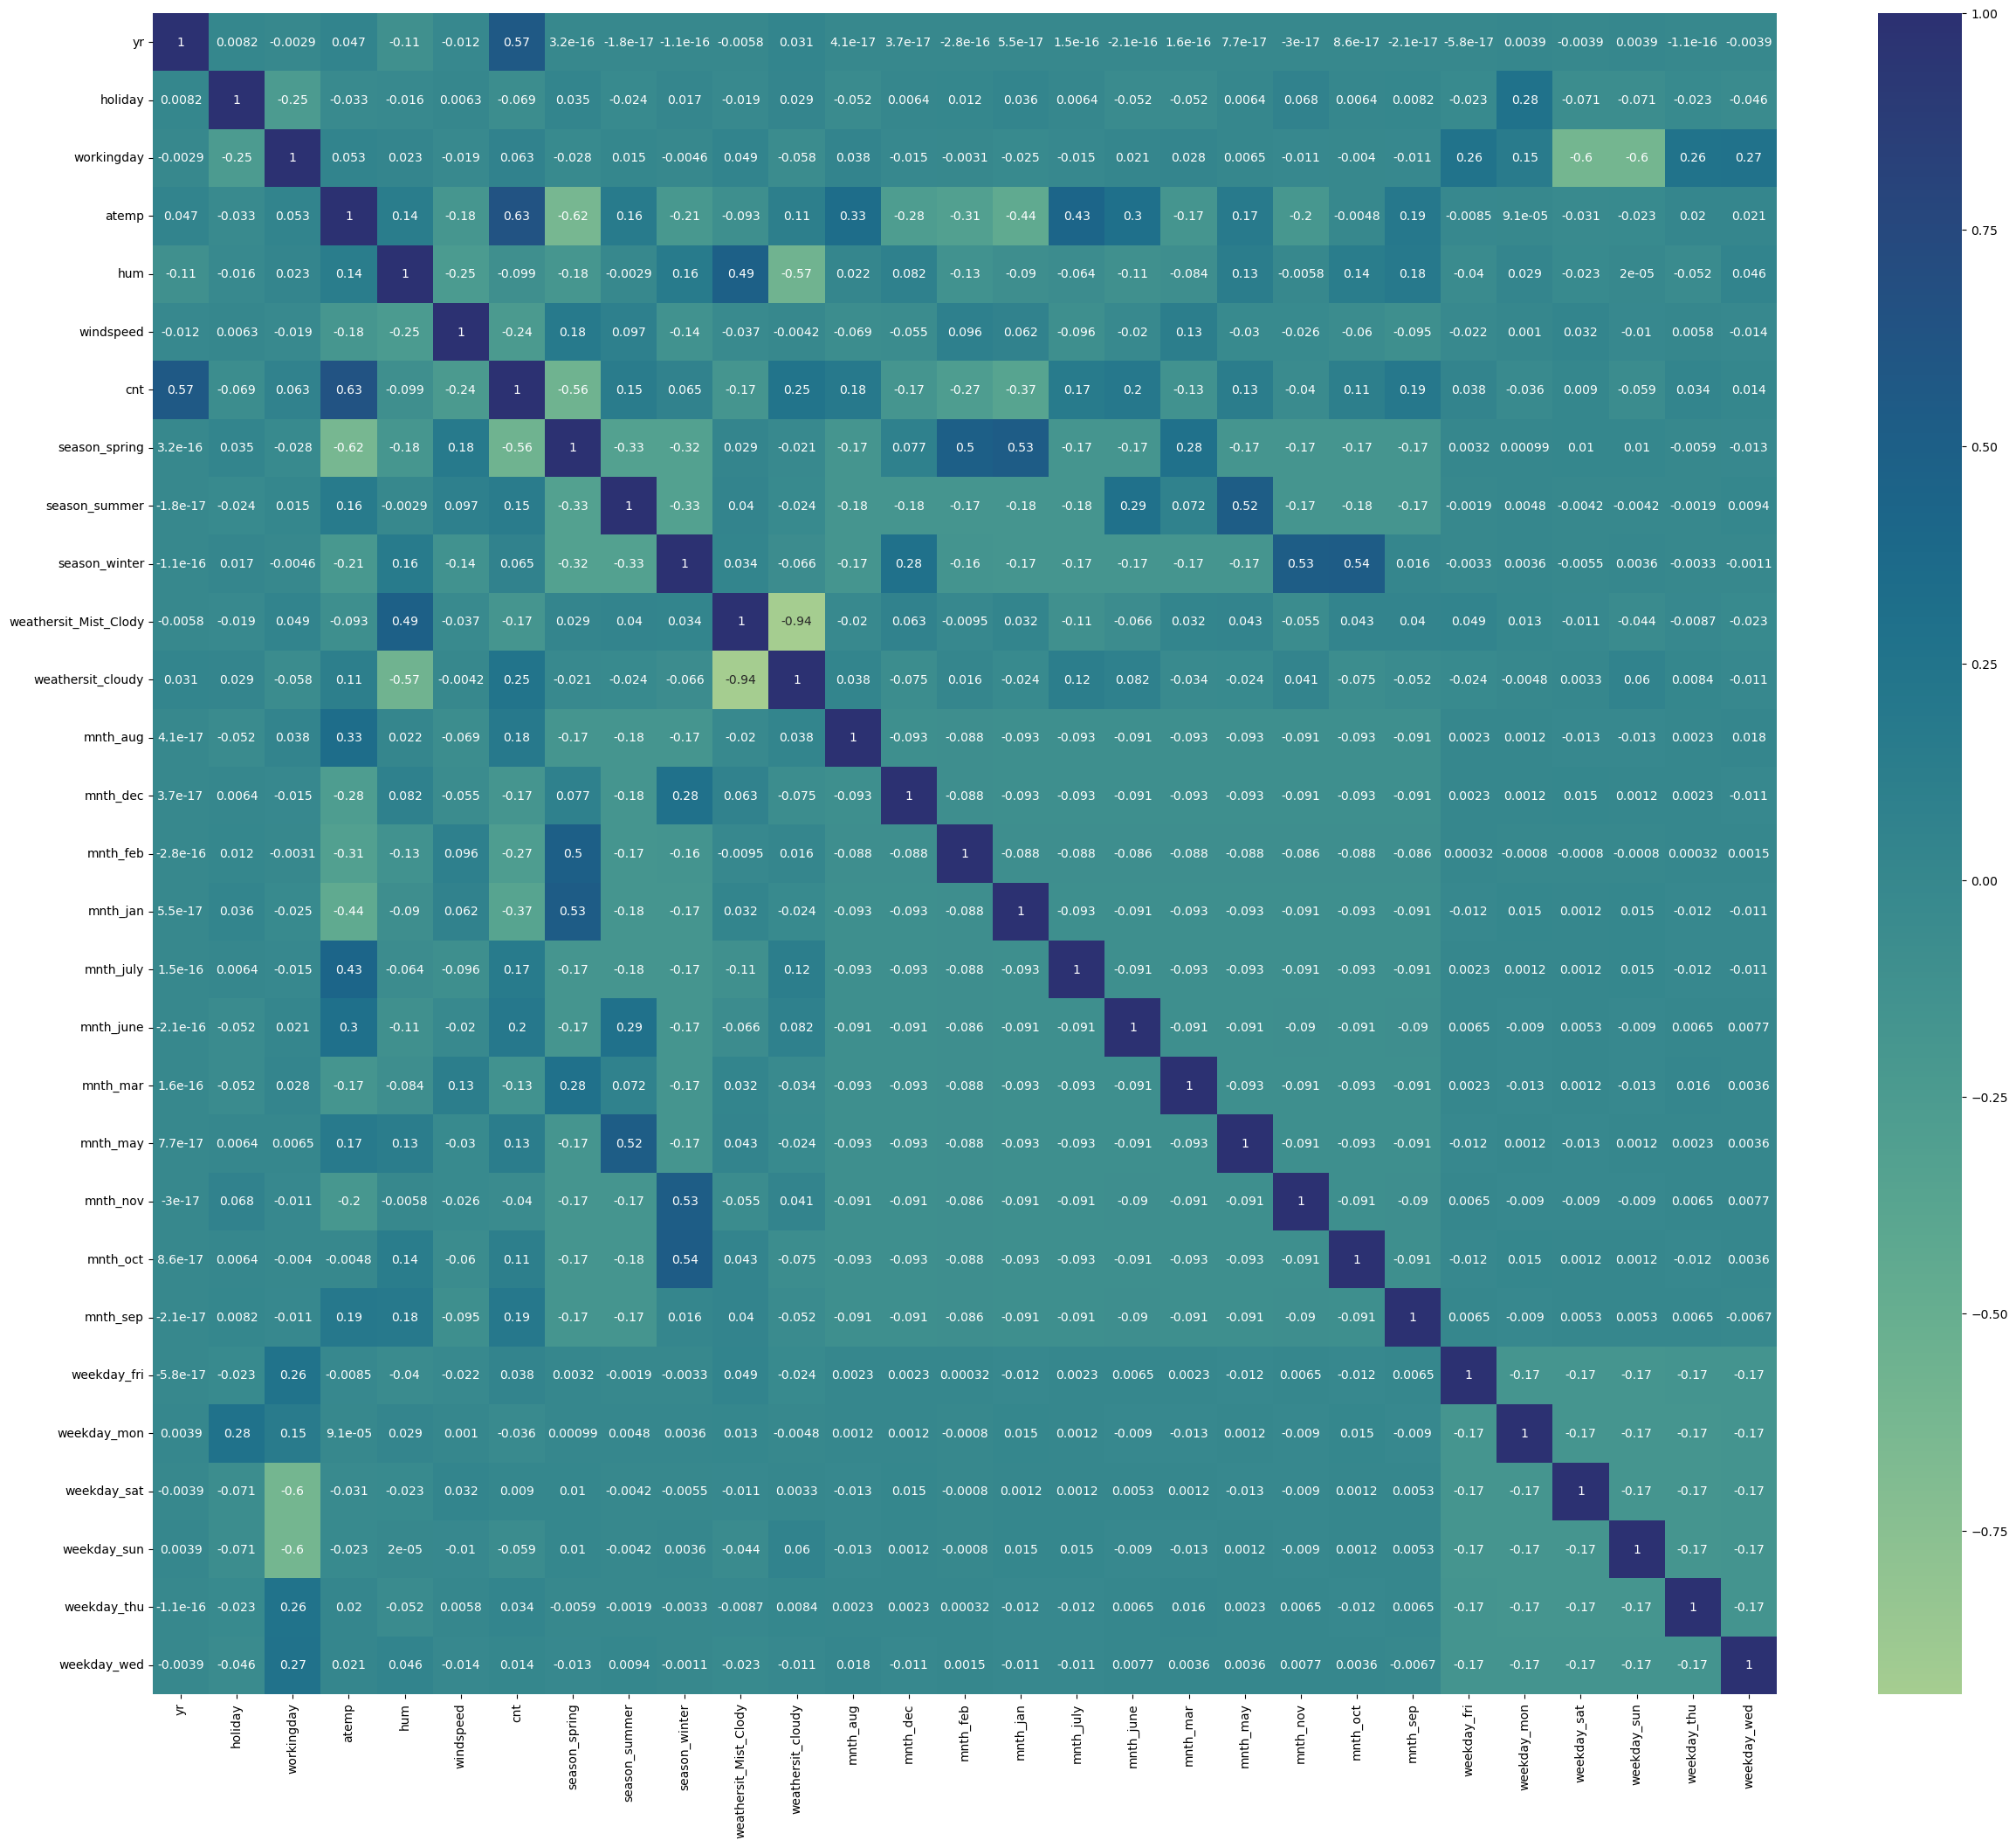

In [340]:
### Check again for high correlation variable
CorrDataset = BoomBike.corr()
plt.figure(figsize=(30,25))
sns.heatmap(CorrDataset, annot=True, cmap='crest')
plt.show()

#### Observation
    1. Remove three columns as it had high correlation that may cause multicollinearity
    2. Columns - 'temp', 'casual','registered'

# Split in to train and test

In [341]:
TrainSet,TestSet = train_test_split(BoomBike,train_size=0.7,random_state=100)
print(TrainSet.shape)
print(TestSet.shape)

(510, 29)
(220, 29)


In [342]:
BoomBike.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Mist_Clody', 'weathersit_cloudy', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_fri',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_wed'],
      dtype='object')

In [343]:
## rescaling the continuous random varibale between O to 1 
scaler = MinMaxScaler()
NonBinVar = ['atemp','hum', 'windspeed','cnt']
TrainSet[NonBinVar] = scaler.fit_transform(TrainSet[NonBinVar])
TrainSet.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,0,0
729,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
483,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,0,0
112,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [344]:
TrainSet[NonBinVar].describe()

,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.513156,0.650480,0.320883,0.513499
std,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.332086,0.538643,0.199179,0.356420
50%,0.529718,0.653714,0.296763,0.518638
75%,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [345]:
#
y_train = TrainSet.pop('cnt')
x_train = TrainSet

In [346]:

x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.07e-179
Time:                        19:30:17   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0484      0.043      1.118      0.264      -0.037       0.134
yr                        0.2344      0.008     28.934      0.000       0.218       0.250
holiday                  -0.0423      0.025     -1.668      0.096      -0.092       0.008
workingday                0.0369      0.014      2.676      0.008       0.010       0.064
atemp                     0.4160      0.045      9.174      0.000       0.327       0.505
hum                      -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                -0.1683      0.026     -6.488      0.000      -0.219      -0.117
season_spring            -0.0519      0.030     -1.724      0.085      -0.111       0.007
season_summer             0.0348      0.026      1.327      0.185      -0.017       0.086
season_winter             0.1015      0.028      3.612      0.000       0.046       0.157
weathersit_Mist_Clody     0.1918      0.025      7.603      0.000       0.142       0.241
weathersit_cloudy         0.2530      0.027      9.497      0.000       0.201       0.305
mnth_aug                  0.0419      0.033      1.257      0.209      -0.024       0.107
mnth_dec                 -0.0526      0.034     -1.560      0.120      -0.119       0.014
mnth_feb                 -0.0404      0.033     -1.221      0.223      -0.105       0.025
mnth_jan                 -0.0736      0.034     -2.188      0.029      -0.140      -0.007
mnth_july                -0.0147      0.035     -0.424      0.672      -0.083       0.053
mnth_june                 0.0242      0.024      1.000      0.318      -0.023       0.072
mnth_mar                 -0.0003      0.025     -0.014      0.989      -0.049       0.048
mnth_may                  0.0363      0.021      1.734      0.084      -0.005       0.077
mnth_nov                 -0.0457      0.037     -1.249      0.212      -0.118       0.026
mnth_oct                  0.0076      0.036      0.210      0.833      -0.063       0.079
mnth_sep                  0.0957      0.032      2.984      0.003       0.033       0.159
weekday_fri               0.0214      0.016      1.368      0.172      -0.009       0.052
weekday_mon              -0.0049      0.015     -0.318      0.751      -0.035       0.025
weekday_sat               0.0541      0.015      3.648      0.000       0.025       0.083
weekday_sun              -0.0003      0.015     -0.022      0.983      -0.030       0.030
weekday_thu               0.0083      0.016      0.535      0.593      -0.022       0.039
weekday_wed               0.0132      0.015      0.889      0.374      -0.016       0.042
==============================================================================
Omnibus:                       85.560   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarqu

In [347]:
### VIF
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
26,weekday_sun,inf
25,weekday_sat,inf
7,season_spring,10.70
11,weathersit_cloudy,10.65
9,season_winter,9.41
10,weathersit_Mist_Clody,9.22
8,season_summer,8.20
20,mnth_nov,6.76


In [348]:
x_train = x_train.drop(['mnth_mar'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,1,0,0,0
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,1,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,1,0,0,0
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [349]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.03e-180
Time:                        19:30:17   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     483   BIC:                            -878.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0482      0.041      1.163      0.246      -0.033       0.130
yr                        0.2344      0.008     28.964      0.000       0.218       0.250
holiday                  -0.0423      0.025     -1.680      0.094      -0.092       0.007
workingday                0.0369      0.013      2.755      0.006       0.011       0.063
atemp                     0.4161      0.045      9.312      0.000       0.328       0.504
hum                      -0.1459      0.039     -3.778      0.000      -0.222      -0.070
windspeed                -0.1683      0.026     -6.507      0.000      -0.219      -0.117
season_spring            -0.0521      0.028     -1.829      0.068      -0.108       0.004
season_summer             0.0349      0.026      1.356      0.176      -0.016       0.085
season_winter             0.1014      0.028      3.679      0.000       0.047       0.156
weathersit_Mist_Clody     0.1918      0.025      7.611      0.000       0.142       0.241
weathersit_cloudy         0.2530      0.027      9.506      0.000       0.201       0.305
mnth_aug                  0.0420      0.031      1.348      0.178      -0.019       0.103
mnth_dec                 -0.0523      0.026     -2.008      0.045      -0.104      -0.001
mnth_feb                 -0.0400      0.022     -1.791      0.074      -0.084       0.004
mnth_jan                 -0.0732      0.022     -3.285      0.001      -0.117      -0.029
mnth_july                -0.0145      0.033     -0.443      0.658      -0.079       0.050
mnth_june                 0.0243      0.023      1.071      0.285      -0.020       0.069
mnth_may                  0.0364      0.019      1.869      0.062      -0.002       0.075
mnth_nov                 -0.0454      0.031     -1.468      0.143      -0.106       0.015
mnth_oct                  0.0079      0.031      0.255      0.799      -0.053       0.069
mnth_sep                  0.0958      0.029      3.308      0.001       0.039       0.153
weekday_fri               0.0214      0.016      1.369      0.172      -0.009       0.052
weekday_mon              -0.0049      0.015     -0.319      0.750      -0.035       0.025
weekday_sat               0.0540      0.014      3.749      0.000       0.026       0.082
weekday_sun              -0.0004      0.015     -0.025      0.980      -0.030       0.029
weekday_thu               0.0083      0.016      0.535      0.593      -0.022       0.039
weekday_wed               0.0132      0.015      0.890      0.374      -0.016       0.042
==============================================================================
Omnibus:                       85.568   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.381
Skew:                          -0.787   Prob(JB):       

In [350]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
24,weekday_sat,inf
2,holiday,inf
3,workingday,inf
25,weekday_sun,inf
11,weathersit_cloudy,10.65
7,season_spring,9.57
10,weathersit_Mist_Clody,9.22
9,season_winter,9.08
8,season_summer,7.90
4,atemp,5.77


In [351]:

## 3 drop the columns High Pvalue and Low VIF
x_train = x_train.drop(['weekday_sun'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_june,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,0,0
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,0,0
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [352]:
### 3
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.03e-180
Time:                        19:30:17   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     483   BIC:                            -878.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0479      0.052      0.918      0.359      -0.055       0.150
yr                        0.2344      0.008     28.964      0.000       0.218       0.250
holiday                  -0.0419      0.031     -1.365      0.173      -0.102       0.018
workingday                0.0373      0.015      2.457      0.014       0.007       0.067
atemp                     0.4161      0.045      9.312      0.000       0.328       0.504
hum                      -0.1459      0.039     -3.778      0.000      -0.222      -0.070
windspeed                -0.1683      0.026     -6.507      0.000      -0.219      -0.117
season_spring            -0.0521      0.028     -1.829      0.068      -0.108       0.004
season_summer             0.0349      0.026      1.356      0.176      -0.016       0.085
season_winter             0.1014      0.028      3.679      0.000       0.047       0.156
weathersit_Mist_Clody     0.1918      0.025      7.611      0.000       0.142       0.241
weathersit_cloudy         0.2530      0.027      9.506      0.000       0.201       0.305
mnth_aug                  0.0420      0.031      1.348      0.178      -0.019       0.103
mnth_dec                 -0.0523      0.026     -2.008      0.045      -0.104      -0.001
mnth_feb                 -0.0400      0.022     -1.791      0.074      -0.084       0.004
mnth_jan                 -0.0732      0.022     -3.285      0.001      -0.117      -0.029
mnth_july                -0.0145      0.033     -0.443      0.658      -0.079       0.050
mnth_june                 0.0243      0.023      1.071      0.285      -0.020       0.069
mnth_may                  0.0364      0.019      1.869      0.062      -0.002       0.075
mnth_nov                 -0.0454      0.031     -1.468      0.143      -0.106       0.015
mnth_oct                  0.0079      0.031      0.255      0.799      -0.053       0.069
mnth_sep                  0.0958      0.029      3.308      0.001       0.039       0.153
weekday_fri               0.0214      0.016      1.369      0.172      -0.009       0.052
weekday_mon              -0.0049      0.015     -0.319      0.750      -0.035       0.025
weekday_sat               0.0544      0.015      3.722      0.000       0.026       0.083
weekday_thu               0.0083      0.016      0.535      0.593      -0.022       0.039
weekday_wed               0.0132      0.015      0.890      0.374      -0.016       0.042
==============================================================================
Omnibus:                       85.568   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.381
Skew:                          -0.787   Prob(JB):                     7.82e-57
Kurtosis:                       6.111   Cond. No.                  

In [353]:
### VIF - 3
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,174.38
11,weathersit_cloudy,10.65
7,season_spring,9.57
10,weathersit_Mist_Clody,9.22
9,season_winter,9.08
8,season_summer,7.90
4,atemp,5.77
12,mnth_aug,5.42
16,mnth_july,4.89
19,mnth_nov,4.85


In [354]:
## 4 drop the columns High Pvalue and Low VIF
x_train = x_train.drop(['mnth_oct'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_july,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,1,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,0,0
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,0,0
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [355]:
### 4
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.00e-181
Time:                        19:30:17   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     484   BIC:                            -884.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0501      0.051      0.978      0.329      -0.051       0.151
yr                        0.2343      0.008     29.010      0.000       0.218       0.250
holiday                  -0.0415      0.031     -1.356      0.176      -0.102       0.019
workingday                0.0371      0.015      2.451      0.015       0.007       0.067
atemp                     0.4168      0.045      9.352      0.000       0.329       0.504
hum                      -0.1450      0.038     -3.774      0.000      -0.221      -0.070
windspeed                -0.1680      0.026     -6.508      0.000      -0.219      -0.117
season_spring            -0.0536      0.028     -1.924      0.055      -0.108       0.001
season_summer             0.0324      0.024      1.364      0.173      -0.014       0.079
season_winter             0.1047      0.024      4.301      0.000       0.057       0.153
weathersit_Mist_Clody     0.1916      0.025      7.614      0.000       0.142       0.241
weathersit_cloudy         0.2528      0.027      9.512      0.000       0.201       0.305
mnth_aug                  0.0389      0.029      1.357      0.175      -0.017       0.095
mnth_dec                 -0.0570      0.018     -3.108      0.002      -0.093      -0.021
mnth_feb                 -0.0413      0.022     -1.902      0.058      -0.084       0.001
mnth_jan                 -0.0744      0.022     -3.427      0.001      -0.117      -0.032
mnth_july                -0.0177      0.030     -0.580      0.562      -0.077       0.042
mnth_june                 0.0229      0.022      1.041      0.298      -0.020       0.066
mnth_may                  0.0358      0.019      1.854      0.064      -0.002       0.074
mnth_nov                 -0.0516      0.019     -2.709      0.007      -0.089      -0.014
mnth_sep                  0.0920      0.025      3.722      0.000       0.043       0.141
weekday_fri               0.0215      0.016      1.375      0.170      -0.009       0.052
weekday_mon              -0.0049      0.015     -0.320      0.749      -0.035       0.025
weekday_sat               0.0543      0.015      3.722      0.000       0.026       0.083
weekday_thu               0.0083      0.015      0.536      0.592      -0.022       0.039
weekday_wed               0.0132      0.015      0.894      0.372      -0.016       0.042
==============================================================================
Omnibus:                       84.681   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.521
Skew:                          -0.782   Prob(JB):                     8.89e-56
Kurtosis:                       6.080   Cond. No.                         31.7
==============================================================================

In [356]:
### VIF - 4
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,169.20
11,weathersit_cloudy,10.64
10,weathersit_Mist_Clody,9.20
7,season_spring,9.17
9,season_winter,7.09
8,season_summer,6.74
4,atemp,5.75
12,mnth_aug,4.60
16,mnth_july,4.21
3,workingday,3.23


In [357]:
x_train = x_train.drop(['weekday_mon'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_jan,mnth_july,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_fri,weekday_sat,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,1,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,0,0
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,0,0
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [358]:
### 5
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          9.75e-183
Time:                        19:30:18   Log-Likelihood:                 523.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     485   BIC:                            -890.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0499      0.051      0.973      0.331      -0.051       0.151
yr                        0.2342      0.008     29.054      0.000       0.218       0.250
holiday                  -0.0460      0.027     -1.682      0.093      -0.100       0.008
workingday                0.0346      0.013      2.671      0.008       0.009       0.060
atemp                     0.4173      0.045      9.377      0.000       0.330       0.505
hum                      -0.1452      0.038     -3.784      0.000      -0.221      -0.070
windspeed                -0.1680      0.026     -6.513      0.000      -0.219      -0.117
season_spring            -0.0534      0.028     -1.920      0.055      -0.108       0.001
season_summer             0.0325      0.024      1.370      0.171      -0.014       0.079
season_winter             0.1047      0.024      4.305      0.000       0.057       0.153
weathersit_Mist_Clody     0.1917      0.025      7.627      0.000       0.142       0.241
weathersit_cloudy         0.2529      0.027      9.526      0.000       0.201       0.305
mnth_aug                  0.0390      0.029      1.361      0.174      -0.017       0.095
mnth_dec                 -0.0571      0.018     -3.113      0.002      -0.093      -0.021
mnth_feb                 -0.0411      0.022     -1.893      0.059      -0.084       0.002
mnth_jan                 -0.0745      0.022     -3.432      0.001      -0.117      -0.032
mnth_july                -0.0176      0.030     -0.577      0.564      -0.077       0.042
mnth_june                 0.0227      0.022      1.034      0.302      -0.020       0.066
mnth_may                  0.0360      0.019      1.864      0.063      -0.002       0.074
mnth_nov                 -0.0514      0.019     -2.699      0.007      -0.089      -0.014
mnth_sep                  0.0921      0.025      3.729      0.000       0.044       0.141
weekday_fri               0.0240      0.013      1.782      0.075      -0.002       0.050
weekday_sat               0.0543      0.015      3.726      0.000       0.026       0.083
weekday_thu               0.0109      0.013      0.818      0.414      -0.015       0.037
weekday_wed               0.0157      0.013      1.252      0.211      -0.009       0.040
==============================================================================
Omnibus:                       84.380   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.529
Skew:                          -0.780   Prob(JB):                     2.40e-55
Kurtosis:                       6.066   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [359]:
### VIF - 5
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,169.15
11,weathersit_cloudy,10.64
10,weathersit_Mist_Clody,9.20
7,season_spring,9.16
9,season_winter,7.09
8,season_summer,6.74
4,atemp,5.75
12,mnth_aug,4.60
16,mnth_july,4.21
20,mnth_sep,2.91


In [360]:
x_train = x_train.drop(['mnth_july'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_feb,mnth_jan,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_fri,weekday_sat,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,0,0
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,0,0
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [361]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.9
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.04e-183
Time:                        19:30:18   Log-Likelihood:                 522.95
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     486   BIC:                            -896.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0427      0.050      0.859      0.390      -0.055       0.140
yr                        0.2344      0.008     29.127      0.000       0.219       0.250
holiday                  -0.0450      0.027     -1.653      0.099      -0.099       0.009
workingday                0.0347      0.013      2.682      0.008       0.009       0.060
atemp                     0.4072      0.041      9.950      0.000       0.327       0.488
hum                      -0.1434      0.038     -3.751      0.000      -0.218      -0.068
windspeed                -0.1673      0.026     -6.498      0.000      -0.218      -0.117
season_spring            -0.0441      0.023     -1.949      0.052      -0.088       0.000
season_summer             0.0411      0.018      2.233      0.026       0.005       0.077
season_winter             0.1138      0.019      6.151      0.000       0.077       0.150
weathersit_Mist_Clody     0.1916      0.025      7.629      0.000       0.142       0.241
weathersit_cloudy         0.2530      0.027      9.537      0.000       0.201       0.305
mnth_aug                  0.0520      0.018      2.918      0.004       0.017       0.087
mnth_dec                 -0.0575      0.018     -3.139      0.002      -0.093      -0.021
mnth_feb                 -0.0421      0.022     -1.950      0.052      -0.085       0.000
mnth_jan                 -0.0762      0.021     -3.549      0.000      -0.118      -0.034
mnth_june                 0.0301      0.018      1.678      0.094      -0.005       0.065
mnth_may                  0.0390      0.019      2.103      0.036       0.003       0.075
mnth_nov                 -0.0512      0.019     -2.694      0.007      -0.089      -0.014
mnth_sep                  0.1021      0.018      5.792      0.000       0.067       0.137
weekday_fri               0.0240      0.013      1.781      0.075      -0.002       0.050
weekday_sat               0.0542      0.015      3.718      0.000       0.026       0.083
weekday_thu               0.0112      0.013      0.846      0.398      -0.015       0.037
weekday_wed               0.0159      0.013      1.263      0.207      -0.009       0.041
==============================================================================
Omnibus:                       85.256   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.516
Skew:                          -0.787   Prob(JB):                     3.28e-56
Kurtosis:                       6.090   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,159.22
11,weathersit_cloudy,10.64
10,weathersit_Mist_Clody,9.20
7,season_spring,6.07
4,atemp,4.87
9,season_winter,4.11
8,season_summer,4.07
15,mnth_jan,2.39
3,workingday,2.37
5,hum,2.00


In [363]:
x_train = x_train.drop(['weekday_thu'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_dec,mnth_feb,mnth_jan,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_fri,weekday_sat,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,1,0
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,1,0
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [364]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.31e-184
Time:                        19:30:18   Log-Likelihood:                 522.57
No. Observations:                 510   AIC:                            -999.1
Df Residuals:                     487   BIC:                            -901.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0446      0.050      0.898      0.369      -0.053       0.142
yr                        0.2342      0.008     29.124      0.000       0.218       0.250
holiday                  -0.0433      0.027     -1.594      0.112      -0.097       0.010
workingday                0.0384      0.012      3.140      0.002       0.014       0.062
atemp                     0.4077      0.041      9.966      0.000       0.327       0.488
hum                      -0.1448      0.038     -3.795      0.000      -0.220      -0.070
windspeed                -0.1675      0.026     -6.509      0.000      -0.218      -0.117
season_spring            -0.0433      0.023     -1.920      0.055      -0.088       0.001
season_summer             0.0411      0.018      2.236      0.026       0.005       0.077
season_winter             0.1135      0.018      6.135      0.000       0.077       0.150
weathersit_Mist_Clody     0.1903      0.025      7.593      0.000       0.141       0.239
weathersit_cloudy         0.2518      0.026      9.507      0.000       0.200       0.304
mnth_aug                  0.0524      0.018      2.941      0.003       0.017       0.087
mnth_dec                 -0.0566      0.018     -3.097      0.002      -0.092      -0.021
mnth_feb                 -0.0429      0.022     -1.989      0.047      -0.085      -0.001
mnth_jan                 -0.0764      0.021     -3.557      0.000      -0.119      -0.034
mnth_june                 0.0302      0.018      1.688      0.092      -0.005       0.065
mnth_may                  0.0391      0.019      2.109      0.035       0.003       0.076
mnth_nov                 -0.0501      0.019     -2.641      0.009      -0.087      -0.013
mnth_sep                  0.1029      0.018      5.846      0.000       0.068       0.137
weekday_fri               0.0203      0.013      1.595      0.111      -0.005       0.045
weekday_sat               0.0541      0.015      3.711      0.000       0.025       0.083
weekday_wed               0.0121      0.012      1.031      0.303      -0.011       0.035
==============================================================================
Omnibus:                       84.483   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.005
Skew:                          -0.777   Prob(JB):                     4.23e-56
Kurtosis:                       6.096   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [365]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,158.91
11,weathersit_cloudy,10.61
10,weathersit_Mist_Clody,9.16
7,season_spring,6.06
4,atemp,4.87
9,season_winter,4.11
8,season_summer,4.07
15,mnth_jan,2.39
3,workingday,2.11
5,hum,2.00


In [366]:
x_train = x_train.drop(['weekday_wed'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_fri,weekday_sat
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,0,1,0,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,1
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [367]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.91e-185
Time:                        19:30:18   Log-Likelihood:                 522.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     488   BIC:                            -906.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0455      0.050      0.918      0.359      -0.052       0.143
yr                        0.2341      0.008     29.111      0.000       0.218       0.250
holiday                  -0.0430      0.027     -1.584      0.114      -0.096       0.010
workingday                0.0418      0.012      3.551      0.000       0.019       0.065
atemp                     0.4080      0.041      9.971      0.000       0.328       0.488
hum                      -0.1446      0.038     -3.789      0.000      -0.220      -0.070
windspeed                -0.1679      0.026     -6.523      0.000      -0.218      -0.117
season_spring            -0.0425      0.023     -1.884      0.060      -0.087       0.002
season_summer             0.0416      0.018      2.260      0.024       0.005       0.078
season_winter             0.1138      0.018      6.152      0.000       0.077       0.150
weathersit_Mist_Clody     0.1886      0.025      7.542      0.000       0.139       0.238
weathersit_cloudy         0.2501      0.026      9.461      0.000       0.198       0.302
mnth_aug                  0.0529      0.018      2.974      0.003       0.018       0.088
mnth_dec                 -0.0567      0.018     -3.104      0.002      -0.093      -0.021
mnth_feb                 -0.0430      0.022     -1.994      0.047      -0.085      -0.001
mnth_jan                 -0.0764      0.021     -3.557      0.000      -0.119      -0.034
mnth_june                 0.0310      0.018      1.732      0.084      -0.004       0.066
mnth_may                  0.0396      0.019      2.137      0.033       0.003       0.076
mnth_nov                 -0.0498      0.019     -2.625      0.009      -0.087      -0.013
mnth_sep                  0.1036      0.018      5.893      0.000       0.069       0.138
weekday_fri               0.0170      0.012      1.378      0.169      -0.007       0.041
weekday_sat               0.0540      0.015      3.708      0.000       0.025       0.083
==============================================================================
Omnibus:                       85.613   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.462
Skew:                          -0.783   Prob(JB):                     1.02e-57
Kurtosis:                       6.147   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [368]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,158.85
11,weathersit_cloudy,10.57
10,weathersit_Mist_Clody,9.13
7,season_spring,6.05
4,atemp,4.87
9,season_winter,4.11
8,season_summer,4.07
15,mnth_jan,2.39
5,hum,2.00
3,workingday,1.95


In [369]:
x_train = x_train.drop(['weekday_fri'],axis=1)
x_train.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,weathersit_cloudy,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_sat
instant,,,,,,,,,,,,,,,,,,,,,
577,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,1,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,0,0,1
729,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,1,0,1,0,0,0,0,0,0,0
483,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,1
112,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.11e-186
Time:                        19:30:18   Log-Likelihood:                 521.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     489   BIC:                            -911.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0471      0.050      0.949      0.343      -0.050       0.145
yr                        0.2338      0.008     29.059      0.000       0.218       0.250
holiday                  -0.0415      0.027     -1.528      0.127      -0.095       0.012
workingday                0.0449      0.012      3.882      0.000       0.022       0.068
atemp                     0.4066      0.041      9.931      0.000       0.326       0.487
hum                      -0.1470      0.038     -3.852      0.000      -0.222      -0.072
windspeed                -0.1683      0.026     -6.533      0.000      -0.219      -0.118
season_spring            -0.0434      0.023     -1.924      0.055      -0.088       0.001
season_summer             0.0404      0.018      2.197      0.029       0.004       0.077
season_winter             0.1131      0.019      6.113      0.000       0.077       0.149
weathersit_Mist_Clody     0.1913      0.025      7.665      0.000       0.142       0.240
weathersit_cloudy         0.2516      0.026      9.519      0.000       0.200       0.304
mnth_aug                  0.0528      0.018      2.965      0.003       0.018       0.088
mnth_dec                 -0.0568      0.018     -3.104      0.002      -0.093      -0.021
mnth_feb                 -0.0431      0.022     -1.994      0.047      -0.086      -0.001
mnth_jan                 -0.0768      0.021     -3.576      0.000      -0.119      -0.035
mnth_june                 0.0307      0.018      1.716      0.087      -0.004       0.066
mnth_may                  0.0400      0.019      2.155      0.032       0.004       0.076
mnth_nov                 -0.0510      0.019     -2.693      0.007      -0.088      -0.014
mnth_sep                  0.1030      0.018      5.852      0.000       0.068       0.138
weekday_sat               0.0539      0.015      3.698      0.000       0.025       0.083
==============================================================================
Omnibus:                       83.994   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.234
Skew:                          -0.759   Prob(JB):                     4.19e-58
Kurtosis:                       6.183   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,158.77
11,weathersit_cloudy,10.55
10,weathersit_Mist_Clody,9.07
7,season_spring,6.04
4,atemp,4.86
9,season_winter,4.11
8,season_summer,4.06
15,mnth_jan,2.39
5,hum,1.99
3,workingday,1.88


In [372]:
x_train = x_train.drop(['holiday'],axis=1)
x_train.head()

,const,yr,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Mist_Clody,weathersit_cloudy,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_june,mnth_may,mnth_nov,mnth_sep,weekday_sat
instant,,,,,,,,,,,,,,,,,,,,
577,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0,0
427,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,0,0,1
729,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,1,0,0,0,0,0,0,0
483,1.0,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,1
112,1.0,0,1,0.318819,0.751824,0.380981,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [373]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.07e-186
Time:                        19:30:19   Log-Likelihood:                 519.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0429      0.050      0.865      0.387      -0.055       0.140
yr                        0.2340      0.008     29.048      0.000       0.218       0.250
workingday                0.0509      0.011      4.689      0.000       0.030       0.072
atemp                     0.4043      0.041      9.869      0.000       0.324       0.485
hum                      -0.1460      0.038     -3.820      0.000      -0.221      -0.071
windspeed                -0.1686      0.026     -6.537      0.000      -0.219      -0.118
season_spring            -0.0445      0.023     -1.969      0.050      -0.089   -8.83e-05
season_summer             0.0394      0.018      2.141      0.033       0.003       0.076
season_winter             0.1130      0.019      6.098      0.000       0.077       0.149
weathersit_Mist_Clody     0.1912      0.025      7.650      0.000       0.142       0.240
weathersit_cloudy         0.2513      0.026      9.495      0.000       0.199       0.303
mnth_aug                  0.0527      0.018      2.956      0.003       0.018       0.088
mnth_dec                 -0.0580      0.018     -3.168      0.002      -0.094      -0.022
mnth_feb                 -0.0447      0.022     -2.067      0.039      -0.087      -0.002
mnth_jan                 -0.0784      0.021     -3.648      0.000      -0.121      -0.036
mnth_june                 0.0317      0.018      1.767      0.078      -0.004       0.067
mnth_may                  0.0408      0.019      2.198      0.028       0.004       0.077
mnth_nov                 -0.0546      0.019     -2.901      0.004      -0.092      -0.018
mnth_sep                  0.1009      0.018      5.743      0.000       0.066       0.135
weekday_sat               0.0600      0.014      4.276      0.000       0.032       0.088
==============================================================================
Omnibus:                       89.602   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.468
Skew:                          -0.799   Prob(JB):                     3.10e-64
Kurtosis:                       6.348   Cond. No.                         29.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,158.29
10,weathersit_cloudy,10.55
9,weathersit_Mist_Clody,9.07
6,season_spring,6.04
3,atemp,4.86
8,season_winter,4.10
7,season_summer,4.05
14,mnth_jan,2.39
4,hum,1.99
13,mnth_feb,1.87


In [375]:
x_train = x_train.drop(['mnth_june'],axis=1)
x_train.head()

,const,yr,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Mist_Clody,weathersit_cloudy,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_may,mnth_nov,mnth_sep,weekday_sat
instant,,,,,,,,,,,,,,,,,,,
577,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0,0
427,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,0,1
729,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,1,0,0,0,0,0,0
483,1.0,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,1
112,1.0,0,1,0.318819,0.751824,0.380981,0,1,0,1,0,0,0,0,0,0,0,0,0


In [376]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.04e-187
Time:                        19:30:19   Log-Likelihood:                 518.19
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -917.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0368      0.050      0.742      0.458      -0.061       0.134
yr                        0.2332      0.008     28.932      0.000       0.217       0.249
workingday                0.0510      0.011      4.684      0.000       0.030       0.072
atemp                     0.4285      0.039     11.072      0.000       0.352       0.505
hum                      -0.1519      0.038     -3.982      0.000      -0.227      -0.077
windspeed                -0.1712      0.026     -6.635      0.000      -0.222      -0.121
season_spring            -0.0430      0.023     -1.900      0.058      -0.087       0.001
season_summer             0.0475      0.018      2.660      0.008       0.012       0.083
season_winter             0.1128      0.019      6.076      0.000       0.076       0.149
weathersit_Mist_Clody     0.1911      0.025      7.632      0.000       0.142       0.240
weathersit_cloudy         0.2509      0.027      9.458      0.000       0.199       0.303
mnth_aug                  0.0462      0.017      2.641      0.009       0.012       0.081
mnth_dec                 -0.0548      0.018     -3.004      0.003      -0.091      -0.019
mnth_feb                 -0.0415      0.022     -1.925      0.055      -0.084       0.001
mnth_jan                 -0.0736      0.021     -3.446      0.001      -0.116      -0.032
mnth_may                  0.0293      0.017      1.682      0.093      -0.005       0.064
mnth_nov                 -0.0523      0.019     -2.778      0.006      -0.089      -0.015
mnth_sep                  0.0966      0.017      5.542      0.000       0.062       0.131
weekday_sat               0.0602      0.014      4.279      0.000       0.033       0.088
==============================================================================
Omnibus:                       88.355   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.836
Skew:                          -0.802   Prob(JB):                     1.27e-60
Kurtosis:                       6.226   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,157.51
10,weathersit_cloudy,10.55
9,weathersit_Mist_Clody,9.07
6,season_spring,6.03
3,atemp,4.31
8,season_winter,4.10
7,season_summer,3.80
14,mnth_jan,2.35
4,hum,1.98
13,mnth_feb,1.85


In [378]:
x_train = x_train.drop(['mnth_may'],axis=1)
print('Columns -> ',x_train.shape)
x_train.head()

Columns ->  (510, 18)


,const,yr,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,weathersit_Mist_Clody,weathersit_cloudy,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_nov,mnth_sep,weekday_sat
instant,,,,,,,,,,,,,,,,,,
577,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0,0,0
427,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,0,0,0,0,1
729,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,1,0,1,0,0,0,0,0
483,1.0,1,0,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,1
112,1.0,0,1,0.318819,0.751824,0.380981,0,1,0,1,0,0,0,0,0,0,0,0


In [379]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.28e-187
Time:                        19:30:19   Log-Likelihood:                 516.73
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     492   BIC:                            -921.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0221      0.049      0.452      0.651      -0.074       0.118
yr                        0.2325      0.008     28.831      0.000       0.217       0.248
workingday                0.0513      0.011      4.706      0.000       0.030       0.073
atemp                     0.4387      0.038     11.457      0.000       0.363       0.514
hum                      -0.1436      0.038     -3.790      0.000      -0.218      -0.069
windspeed                -0.1731      0.026     -6.699      0.000      -0.224      -0.122
season_spring            -0.0388      0.023     -1.723      0.086      -0.083       0.005
season_summer             0.0596      0.016      3.640      0.000       0.027       0.092
season_winter             0.1149      0.019      6.190      0.000       0.078       0.151
weathersit_Mist_Clody     0.1933      0.025      7.713      0.000       0.144       0.243
weathersit_cloudy         0.2533      0.027      9.545      0.000       0.201       0.305
mnth_aug                  0.0460      0.018      2.627      0.009       0.012       0.080
mnth_dec                 -0.0534      0.018     -2.924      0.004      -0.089      -0.018
mnth_feb                 -0.0400      0.022     -1.854      0.064      -0.082       0.002
mnth_jan                 -0.0719      0.021     -3.361      0.001      -0.114      -0.030
mnth_nov                 -0.0505      0.019     -2.681      0.008      -0.087      -0.013
mnth_sep                  0.0965      0.017      5.526      0.000       0.062       0.131
weekday_sat               0.0598      0.014      4.245      0.000       0.032       0.088
==============================================================================
Omnibus:                       85.574   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.975
Skew:                          -0.797   Prob(JB):                     3.17e-55
Kurtosis:                       6.045   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [380]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,152.64
10,weathersit_cloudy,10.51
9,weathersit_Mist_Clody,9.05
6,season_spring,5.96
3,atemp,4.21
8,season_winter,4.09
7,season_summer,3.18
14,mnth_jan,2.35
4,hum,1.94
13,mnth_feb,1.85


In [381]:
x_train = x_train.drop(['season_spring'],axis=1)
print('Columns -> ',x_train.shape)
x_train.head()

Columns ->  (510, 17)


,const,yr,workingday,atemp,hum,windspeed,season_summer,season_winter,weathersit_Mist_Clody,weathersit_cloudy,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_nov,mnth_sep,weekday_sat
instant,,,,,,,,,,,,,,,,,
577,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,0,0,0,0
427,1.0,1,0,0.438975,0.640189,0.255342,0,0,1,0,0,0,0,0,0,0,1
729,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,1,0,1,0,0,0,0,0
483,1.0,1,0,0.391735,0.504508,0.188475,1,0,1,0,0,0,0,0,0,0,1
112,1.0,0,1,0.318819,0.751824,0.380981,1,0,1,0,0,0,0,0,0,0,0


In [382]:
### 2
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.22e-188
Time:                        19:30:19   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0061      0.046     -0.132      0.895      -0.097       0.085
yr                        0.2317      0.008     28.722      0.000       0.216       0.248
workingday                0.0511      0.011      4.681      0.000       0.030       0.073
atemp                     0.4763      0.032     15.107      0.000       0.414       0.538
hum                      -0.1518      0.038     -4.030      0.000      -0.226      -0.078
windspeed                -0.1769      0.026     -6.859      0.000      -0.228      -0.126
season_summer             0.0780      0.012      6.271      0.000       0.054       0.102
season_winter             0.1357      0.014      9.601      0.000       0.108       0.163
weathersit_Mist_Clody     0.1898      0.025      7.584      0.000       0.141       0.239
weathersit_cloudy         0.2487      0.026      9.402      0.000       0.197       0.301
mnth_aug                  0.0575      0.016      3.549      0.000       0.026       0.089
mnth_dec                 -0.0525      0.018     -2.871      0.004      -0.088      -0.017
mnth_feb                 -0.0500      0.021     -2.399      0.017      -0.091      -0.009
mnth_jan                 -0.0792      0.021     -3.772      0.000      -0.120      -0.038
mnth_nov                 -0.0463      0.019     -2.476      0.014      -0.083      -0.010
mnth_sep                  0.1068      0.016      6.487      0.000       0.074       0.139
weekday_sat               0.0593      0.014      4.203      0.000       0.032       0.087
==============================================================================
Omnibus:                       78.325   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.743   Prob(JB):                     1.49e-48
Kurtosis:                       5.856   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
### VIF - 2
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,135.52
9,weathersit_cloudy,10.41
8,weathersit_Mist_Clody,8.99
3,atemp,2.84
7,season_winter,2.36
13,mnth_jan,2.25
4,hum,1.91
6,season_summer,1.83
14,mnth_nov,1.75
12,mnth_feb,1.72


#### Observation
    1. High P-Value and Low VIF independent variable are removed 
    2. removing columns

#### Observation
    1. Only one column with High VIF and low P-Value was removed
    2. Column - weathersit_cloudy
    3. Now the VIF is < 5 and P-Value is <0.05
    4. R2 value is = 82% or 0.818

## Residual Analysis
    1. Residual Analysis on the trainset.

<Axes: ylabel='Density'>

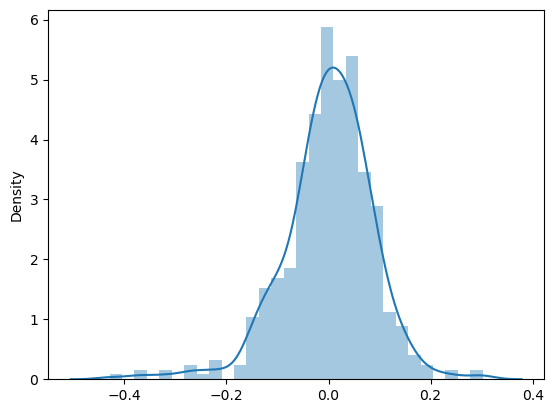

In [386]:
Y_train_Pred = lr_model.predict(x_train)
res = y_train - Y_train_Pred
sns.distplot(res)

## Final Step - Preduction on Testset

In [387]:
# Scaling the numerical columns in testset
NonBinVar = ['atemp','hum', 'windspeed', 'cnt']
TestSet[NonBinVar] = scaler.transform(TestSet[NonBinVar])
TestSet.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
instant,,,,,,,,,,,,,,,,,,,,,
185,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,1,0,0,0,0
536,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,1
300,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,0,1,0
222,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
153,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [388]:
# check the testset columns and them min-max values
TestSet.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.072727,0.086364,0.086364,0.177273,0.127273,0.118182,0.145455,0.163636,0.100000
std,0.500809,0.187620,0.459303,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.260281,0.281541,0.281541,0.382770,0.334038,0.323559,0.353363,0.370789,0.300684
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [389]:
# Delete columns which where removed from trian set.
deletecolumns = [ 'holiday', 
                   'season_spring', 
                   'mnth_july', 'mnth_june', 'mnth_mar',
                   'mnth_may',  'mnth_oct',  'weekday_fri',
                   'weekday_mon',  'weekday_sun', 'weekday_thu',
                   'weekday_wed']


TestSet = TestSet.drop(deletecolumns,axis=1)
TestSet.shape

(220, 17)

In [390]:
#x_test = TestSet

In [391]:
# Split x & Y test for anaysis
y_test = TestSet.pop('cnt')
x_test = TestSet

In [392]:
# Add constant in the x testset
x_test_sm = TestSet = sm.add_constant(x_test)

In [393]:
### prediction based on the test set
y_test_pred = lr_model.predict(x_test_sm)

### Evaluation

In [394]:
### Calculate the Rsquare for prediction testset
round(r2_score(y_true=y_test,y_pred=y_test_pred),3)

0.822

In [395]:
### Trainsset Rsquare value for compare and conclude
x_train = sm.add_constant(x_train)
Lr = sm.OLS(y_train,x_train)
lr_model = Lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.22e-188
Time:                        19:31:11   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0061      0.046     -0.132      0.895      -0.097       0.085
yr                        0.2317      0.008     28.722      0.000       0.216       0.248
workingday                0.0511      0.011      4.681      0.000       0.030       0.073
atemp                     0.4763      0.032     15.107      0.000       0.414       0.538
hum                      -0.1518      0.038     -4.030      0.000      -0.226      -0.078
windspeed                -0.1769      0.026     -6.859      0.000      -0.228      -0.126
season_summer             0.0780      0.012      6.271      0.000       0.054       0.102
season_winter             0.1357      0.014      9.601      0.000       0.108       0.163
weathersit_Mist_Clody     0.1898      0.025      7.584      0.000       0.141       0.239
weathersit_cloudy         0.2487      0.026      9.402      0.000       0.197       0.301
mnth_aug                  0.0575      0.016      3.549      0.000       0.026       0.089
mnth_dec                 -0.0525      0.018     -2.871      0.004      -0.088      -0.017
mnth_feb                 -0.0500      0.021     -2.399      0.017      -0.091      -0.009
mnth_jan                 -0.0792      0.021     -3.772      0.000      -0.120      -0.038
mnth_nov                 -0.0463      0.019     -2.476      0.014      -0.083      -0.010
mnth_sep                  0.1068      0.016      6.487      0.000       0.074       0.139
weekday_sat               0.0593      0.014      4.203      0.000       0.032       0.087
==============================================================================
Omnibus:                       78.325   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.743   Prob(JB):                     1.49e-48
Kurtosis:                       5.856   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observation:
    1. Rsquare value from train set is - 0.846
    2. Rsquare value from test set is 0.822
    3. The model is well trained and the prediction is made correctly.
    4. Removed Multicollinearity, Overfit, underfit effect.